In [1]:
import os
import opensim as osim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.abspath('../../analysis/'))

import importlib
import jam_analysis
from jam_analysis import JamAnalysis
from jam_analysis import get_h5_output

In [2]:
results_basename = "cycling" # for file sharing
path_comak_h5_files = [f'./results/joint-mechanics/{results_basename}.h5',]

fontsize=20
linewidth=5

jam = JamAnalysis()
jam.jam_analysis(path_comak_h5_files)

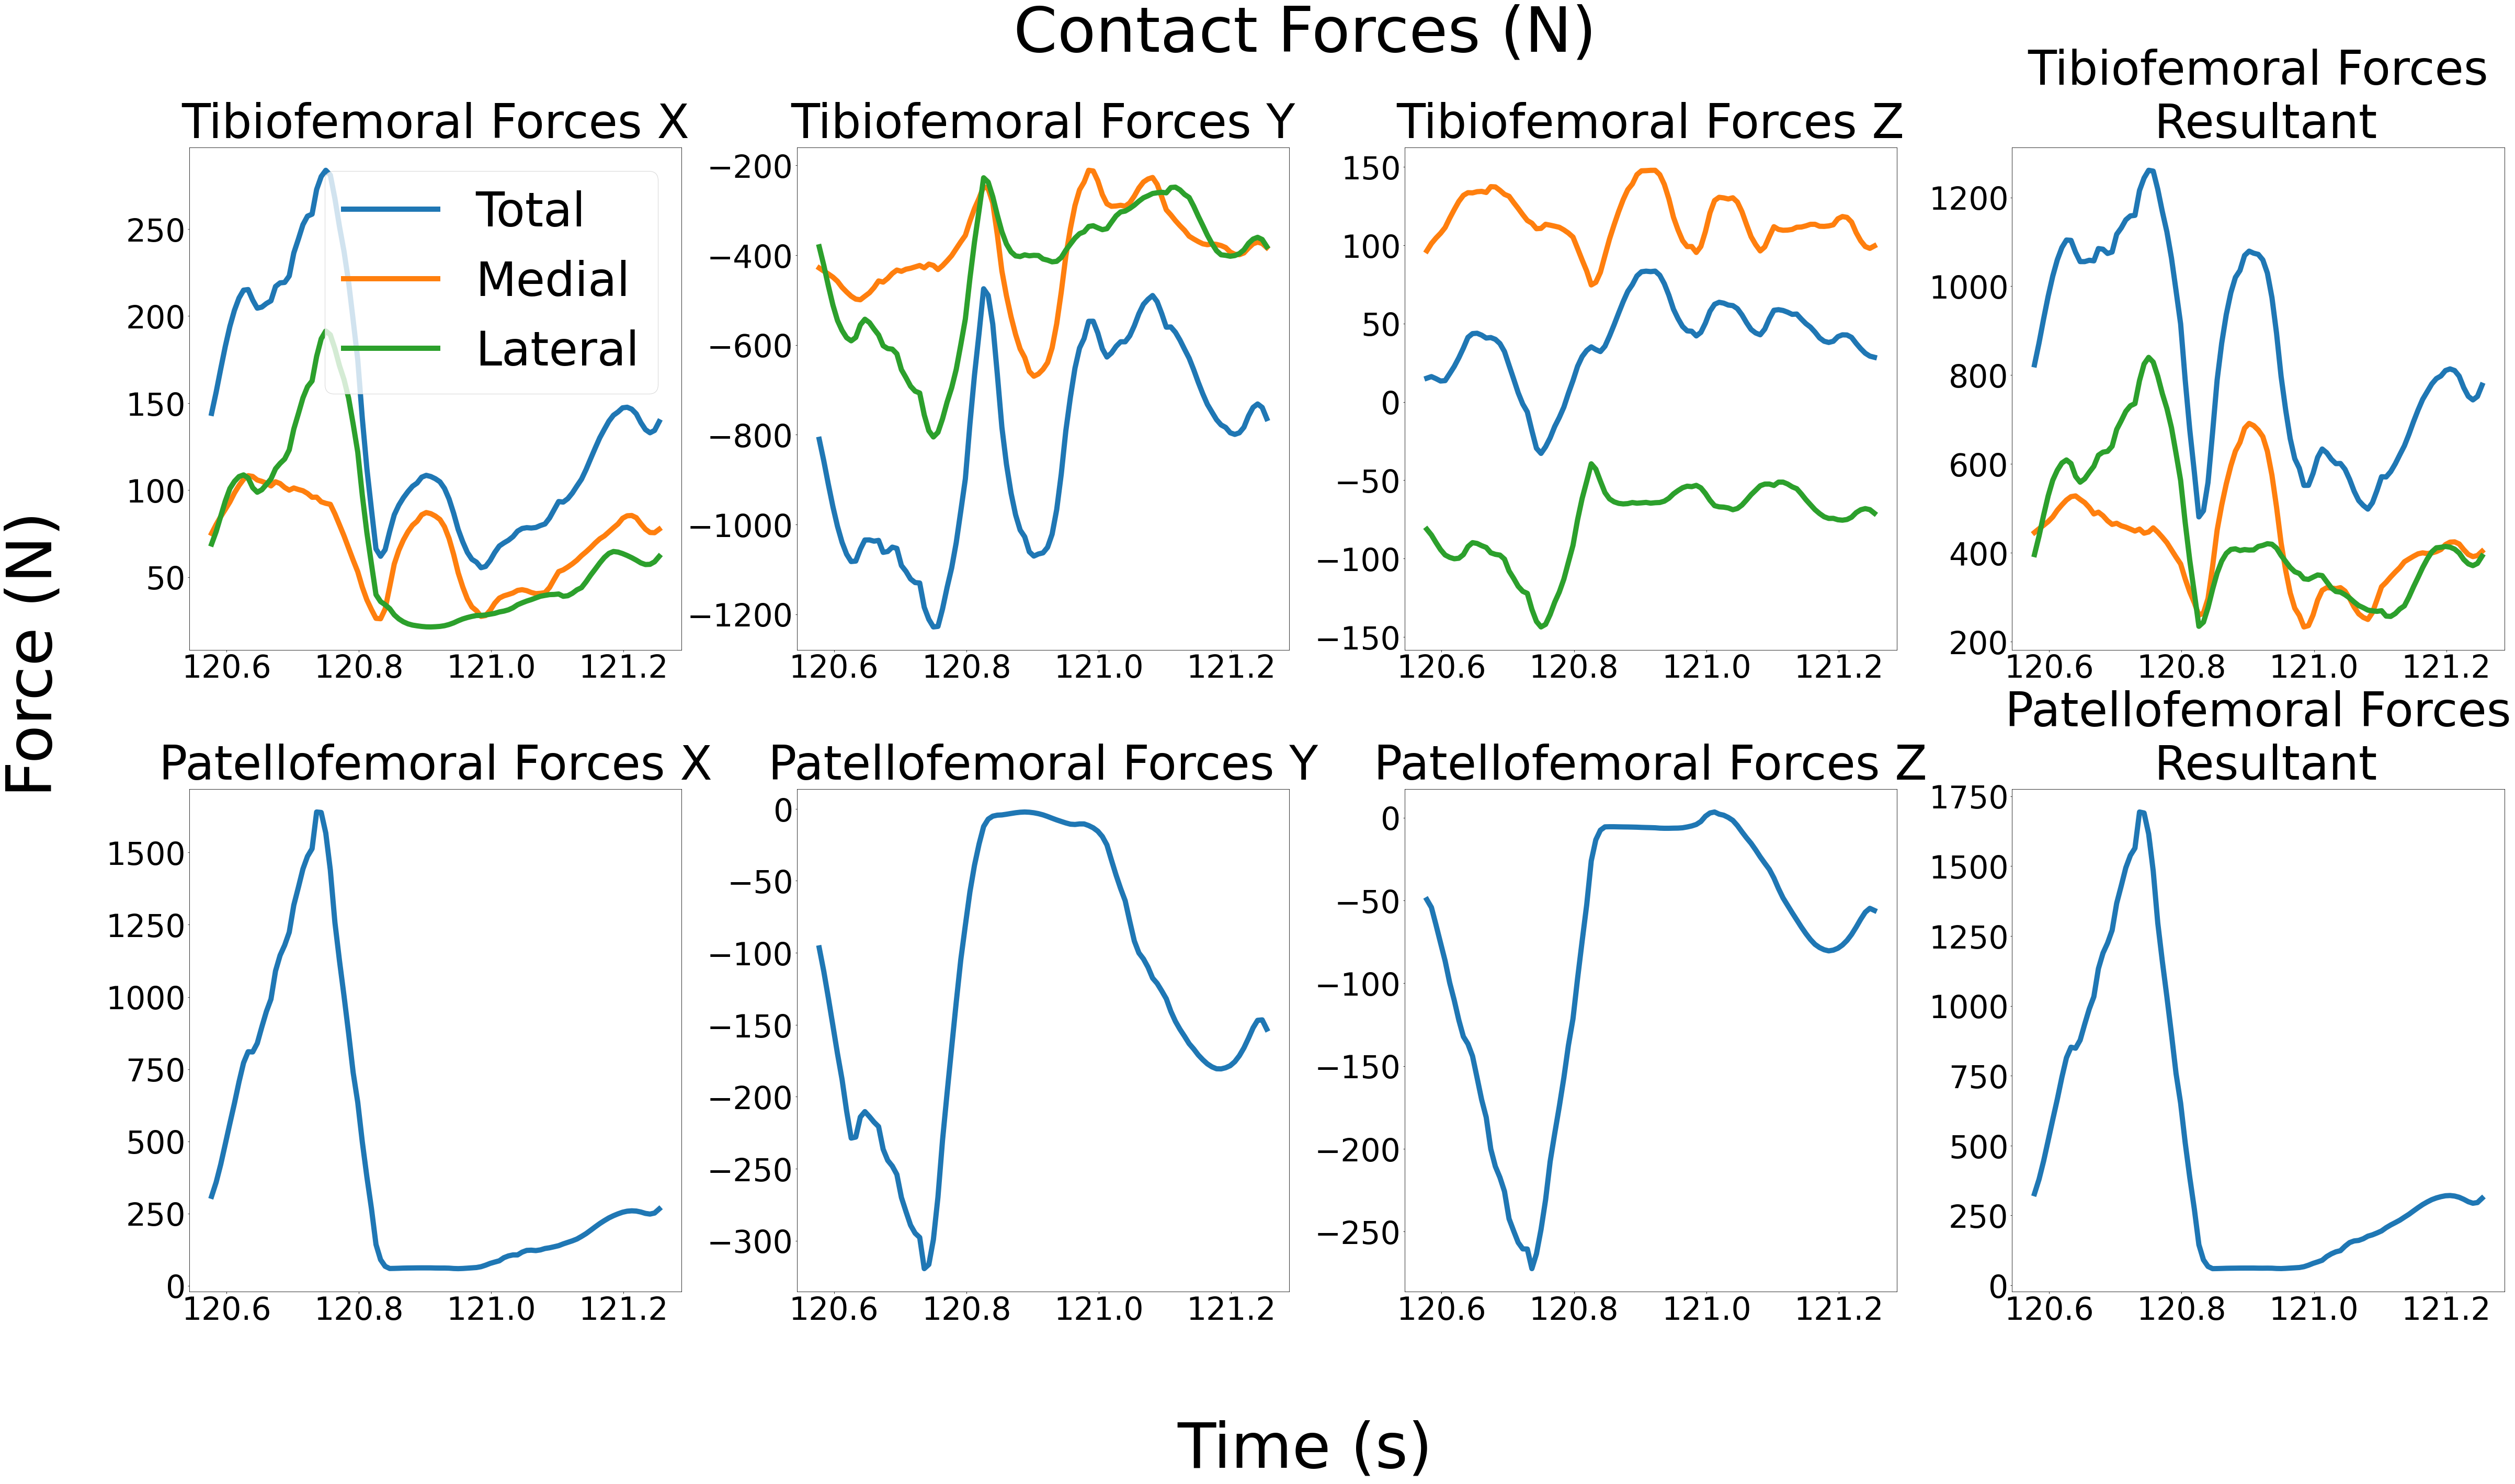

In [4]:
cols = 4
rows = 2
linewidth = 10
fontsize = 30


fig, ax = plt.subplots(rows, cols, figsize=(16*cols, (rows+1)*12))
title = fig.suptitle('Contact Forces (N)', fontsize=fontsize*4)

for axis_idx, axis in enumerate(['X', 'Y', 'Z']):
    # TF - Total, Medial, Lateral
    ax[0, axis_idx].set_title(f'Tibiofemoral Forces {axis}', fontsize=fontsize*3)
    ax[0, axis_idx].plot(
        jam.time,
        jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage']['total_contact_force'][:,axis_idx],
        linewidth=linewidth,
        label='Total'
    )

    ax[0, axis_idx].plot(
        jam.time,
        jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage'][4]['regional_contact_force'][:,axis_idx],
        linewidth=linewidth,
        label='Medial'
    )
    ax[0, axis_idx].plot(
        jam.time,
        jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage'][5]['regional_contact_force'][:,axis_idx],
        linewidth=linewidth,
        label='Lateral'
    )
    
    ax[0, axis_idx].xaxis.set_tick_params(labelsize=fontsize*2)
    ax[0, axis_idx].yaxis.set_tick_params(labelsize=fontsize*2)
    
    # PF - Total, Medial, Lateral
    ax[1, axis_idx].set_title(f'Patellofemoral Forces {axis}', fontsize=fontsize*3)
    ax[1, axis_idx].plot(
        jam.time,
        jam.forceset['Smith2018ArticularContactForce']['pf_contact']['patella_cartilage']['total_contact_force'][:,axis_idx],
        linewidth=linewidth,
        label='Total'
    )
    
    ax[1, axis_idx].xaxis.set_tick_params(labelsize=fontsize*2)
    ax[1, axis_idx].yaxis.set_tick_params(labelsize=fontsize*2)


resultant_tf_total = np.linalg.norm(
    jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage']['total_contact_force'],
    axis=1
)
resultant_tf_med = np.linalg.norm(
    jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage'][4]['regional_contact_force'],
    axis=1
)
resultant_tf_lat = np.linalg.norm(
    jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage'][5]['regional_contact_force'],
    axis=1
)

ax[0, 3].set_title(f'Tibiofemoral Forces\n Resultant', fontsize=fontsize*3)

ax[0, 3].plot(
    jam.time,
    resultant_tf_total,
    linewidth=linewidth,
    label='Total'
)
ax[0, 3].plot(
    jam.time,
    resultant_tf_med,
    linewidth=linewidth,
    label='Medial'
)
ax[0, 3].plot(
    jam.time,
    resultant_tf_lat,
    linewidth=linewidth,
    label='Lateral'
)
ax[0, 3].yaxis.set_tick_params(labelsize=fontsize*2)
ax[0, 3].xaxis.set_tick_params(labelsize=fontsize*2)


resultant_pf_total = np.linalg.norm(
    jam.forceset['Smith2018ArticularContactForce']['pf_contact']['patella_cartilage']['total_contact_force'],
    axis=1
)
ax[1, 3].set_title(f'Patellofemoral Forces\n Resultant', fontsize=fontsize*3)
ax[1, 3].plot(
    jam.time,
    resultant_pf_total,
    linewidth=linewidth,
    label='Total'
)
ax[1, 3].yaxis.set_tick_params(labelsize=fontsize*2)
ax[1, 3].xaxis.set_tick_params(labelsize=fontsize*2)

# ax[0, 0].set_ylabel('Force (N)', fontsize=fontsize*4)
ylabel = fig.text(-0.04, 0.5, 'Force (N)', va='center', rotation='vertical', fontsize=fontsize*4)
xlabel = fig.text(0.5, -0.1, 'Time (s)', ha='center', fontsize=fontsize*4)

ax[0, 0].legend(fontsize=fontsize*3)

plt.tight_layout()

plt.savefig('./results/Contact_forces.png', 
            bbox_extra_artists=(xlabel, ylabel, title),
            bbox_inches="tight")
# for row_ in range(rows):
# #         ax[row_, axis_idx].set_title(axis, fontsize=fontsize*3)
#     ax[row_, axis_idx].xaxis.set_tick_params(labelsize=fontsize*2)
#     ax[row_, axis_idx].yaxis.set_tick_params(labelsize=fontsize*2)


# for row_ in range(rows):
#     for col_ in enumerage(('X', 'Y', 'Z'))
#     ax[row_, col_].set_title(outcome, fontsize=fontsize*3)
#     ax[row_, col_].xaxis.set_tick_params(labelsize=fontsize*2)
#     ax[row_, col_].yaxis.set_tick_params(labelsize=fontsize*2)
    
    
    